    https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-kv2001

In [1]:
#Importing the required libraries
import tensorflow as tf
import tensorflow.keras.layers as L

import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore

/Users/Anaconda/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Anaconda/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Anaconda/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Anaconda/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

In [2]:
bank_data = pd.read_csv('Churn_Modelling.csv')

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_data.dtypes   # find data types

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Dropping Unique IDs

In [6]:
bank_data.drop(['RowNumber','CustomerId'], axis=1, inplace=True)

In [7]:
bank_data.drop(['Surname'], axis=1, inplace=True)   # dropping "Surname"

In [8]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
(bank_data.isnull().sum()/len(bank_data)*100)    #check for missing values

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbed1070e90>,
      dtype=object)

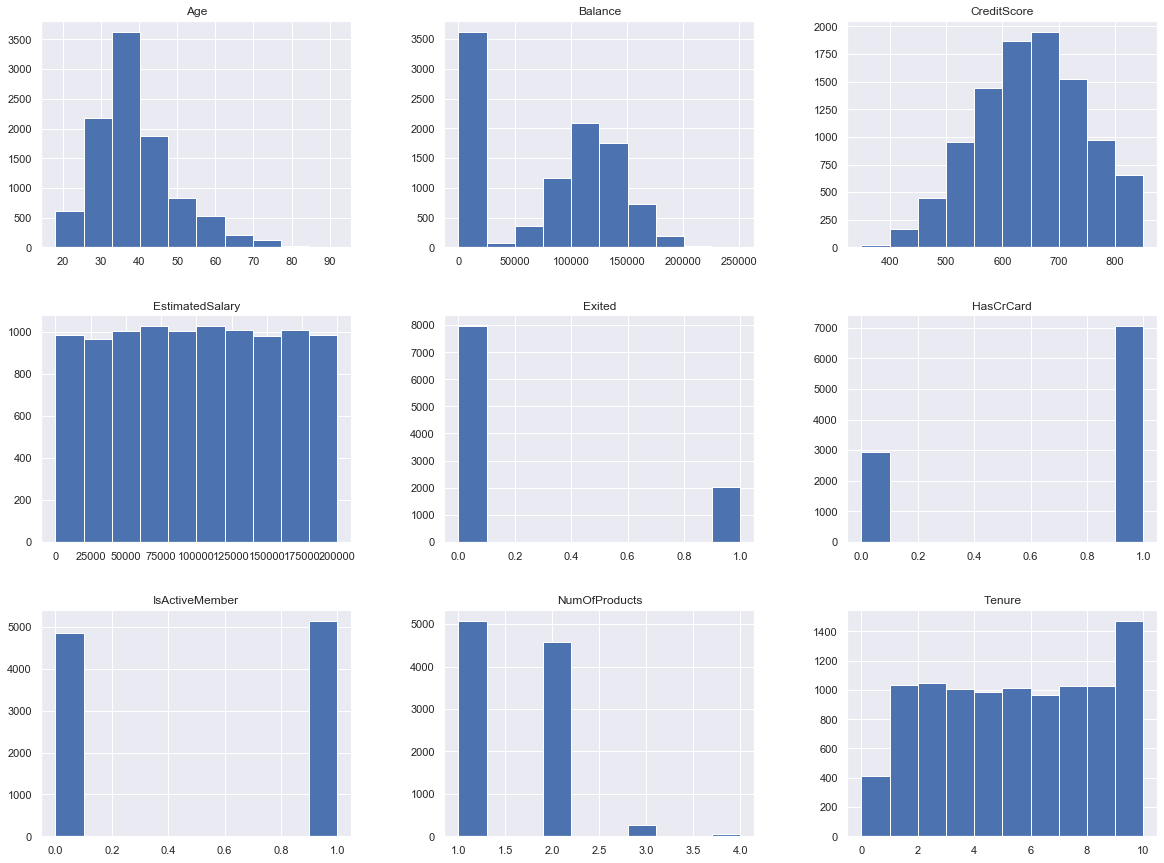

In [10]:
bank_data.hist(bins=10, figsize=(20,15))

Distinguish the features and target variable

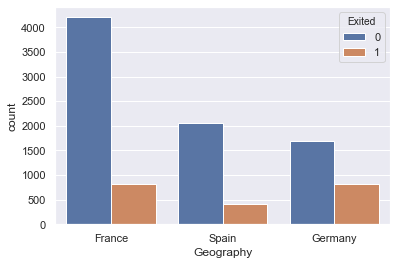

In [11]:
sns.countplot(bank_data['Geography'],hue=bank_data['Exited']);

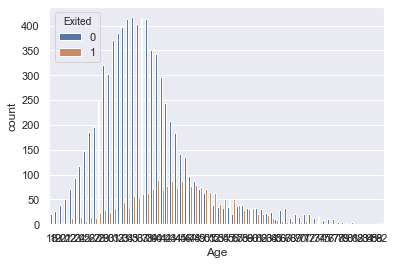

In [12]:
sns.countplot(bank_data['Age'],hue=bank_data['Exited']);

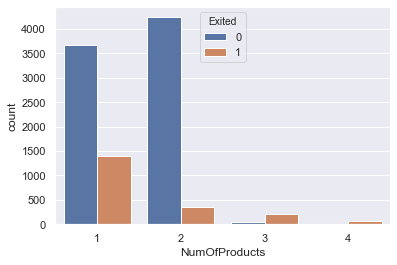

In [13]:
sns.countplot(bank_data['NumOfProducts'],hue=bank_data['Exited']);

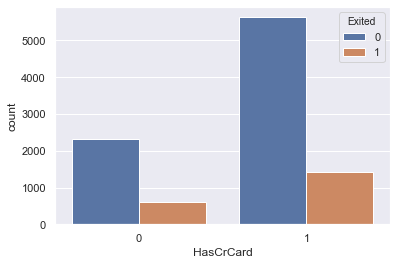

In [14]:
sns.countplot(bank_data['HasCrCard'],hue=bank_data['Exited']);

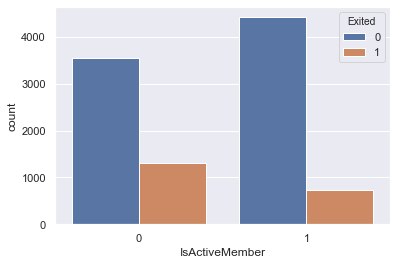

In [15]:
sns.countplot(bank_data['IsActiveMember'],hue=bank_data['Exited']);

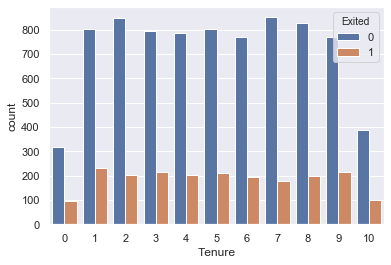

In [16]:
sns.countplot(bank_data['Tenure'],hue=bank_data['Exited']);

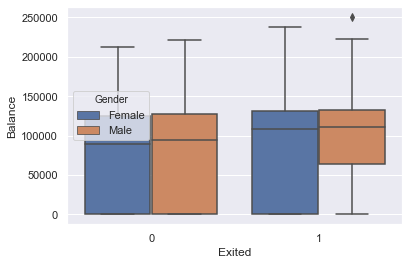

In [17]:
sns.boxplot(bank_data['Exited'], bank_data['Balance'], hue=bank_data['Gender']);

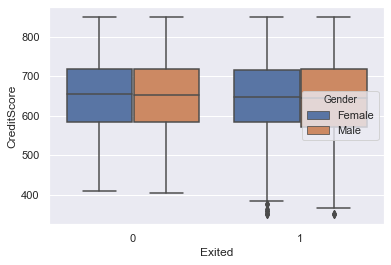

In [18]:
sns.boxplot(bank_data['Exited'], bank_data['CreditScore'], hue=bank_data['Gender']);

In [19]:
# categorical columns Geography & Gender - OneHotEncoding
bank_data['Geography']=bank_data['Geography'].replace({1: 'France', 2: 'Spain', 3: 'Germany'})
bank_data['Gender']=bank_data['Gender'].replace({0: 'Male', 1: 'Female'})
bank_data = pd.get_dummies(bank_data, columns=['Geography','Gender'])


Divide the data set into training and test sets

In [20]:
bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [21]:
X=bank_data.drop(['Exited','Geography_Germany','Gender_Female'],axis=1)
y=bank_data['Exited']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=123, test_size=0.2)

In [23]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_val.shape}, {y_val.shape}')

training shapes: (8000, 11), (8000,)
testing shapes: (2000, 11), (2000,)


Normalize

In [34]:
from sklearn.preprocessing import Normalizer
normalize=Normalizer(norm="l2")
X_train=normalize.transform(X_train)

print(X_train)

[[1.33406083e-02 5.52787637e-04 1.84262546e-04 ... 1.84262546e-05
  0.00000000e+00 1.84262546e-05]
 [4.57276223e-03 2.93801857e-04 7.53338094e-05 ... 7.53338094e-06
  0.00000000e+00 0.00000000e+00]
 [9.62111707e-03 4.29514155e-04 3.68154990e-05 ... 0.00000000e+00
  1.22718330e-05 1.22718330e-05]
 ...
 [6.13572823e-03 1.79145350e-04 3.58290699e-05 ... 8.95726749e-06
  0.00000000e+00 8.95726749e-06]
 [3.37263778e-03 1.57354795e-04 2.62257992e-05 ... 5.24515984e-06
  0.00000000e+00 5.24515984e-06]
 [7.75747037e-02 3.95789305e-03 4.52330634e-04 ... 1.13082658e-04
  0.00000000e+00 1.13082658e-04]]


In [37]:
X_val=normalize.transform(X_val)
print(X_val)

[[6.97532699e-03 3.04443027e-04 4.47710333e-05 ... 0.00000000e+00
  8.95420666e-06 0.00000000e+00]
 [3.76086390e-03 1.30725216e-04 5.02789292e-06 ... 5.02789292e-06
  0.00000000e+00 0.00000000e+00]
 [5.96547792e-03 2.56579695e-04 9.16356055e-05 ... 9.16356055e-06
  0.00000000e+00 9.16356055e-06]
 ...
 [4.34560700e-03 2.95407989e-04 6.21911556e-05 ... 7.77389445e-06
  0.00000000e+00 0.00000000e+00]
 [4.41791994e-03 2.84387062e-04 6.61365260e-05 ... 0.00000000e+00
  6.61365260e-06 6.61365260e-06]
 [4.40732584e-03 2.60128844e-04 6.68902741e-05 ... 7.43225268e-06
  0.00000000e+00 7.43225268e-06]]


Initialize and build the model

In [24]:
import tensorflow as tf 
from tensorflow import keras 

In [25]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(X_train.shape[1], )),
    keras.layers.Dense(units=300, activation='relu'),
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 33,801
Trainable params: 33,801
Non-trainable params: 0
_________________________________________________________________


optimize the model

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping_cb], validation_data=(X_val, y_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 72us/sample - loss: 393.7413 - acc: 0.6835 - val_loss: 268.3481 - val_acc: 0.7885
Epoch 2/100
8000/8000 [==============================] - 0s 45us/sample - loss: 248.9930 - acc: 0.6754 - val_loss: 71.1228 - val_acc: 0.6765
Epoch 3/100
8000/8000 [==============================] - 0s 46us/sample - loss: 236.9086 - acc: 0.6820 - val_loss: 61.9033 - val_acc: 0.7655
Epoch 4/100
8000/8000 [==============================] - 0s 31us/sample - loss: 156.7780 - acc: 0.6805 - val_loss: 169.8648 - val_acc: 0.7930
Epoch 5/100
8000/8000 [==============================] - 0s 31us/sample - loss: 124.6500 - acc: 0.6810 - val_loss: 239.2593 - val_acc: 0.7930
Epoch 6/100
8000/8000 [==============================] - 0s 31us/sample - loss: 163.1191 - acc: 0.6785 - val_loss: 94.8636 - val_acc: 0.7930
Epoch 7/100
8000/8000 [==============================] - 0s 31us/sample - loss: 75.5172 - acc: 0.6837 -

8000/8000 [==============================] - 0s 31us/sample - loss: 0.5042 - acc: 0.7971 - val_loss: 0.5076 - val_acc: 0.7930
Epoch 60/100
8000/8000 [==============================] - 0s 30us/sample - loss: 0.5058 - acc: 0.7970 - val_loss: 0.5278 - val_acc: 0.7930
Epoch 61/100
8000/8000 [==============================] - 0s 30us/sample - loss: 0.5011 - acc: 0.7971 - val_loss: 0.5095 - val_acc: 0.7925
Epoch 62/100
8000/8000 [==============================] - 0s 30us/sample - loss: 0.5017 - acc: 0.7971 - val_loss: 0.5076 - val_acc: 0.7915
Epoch 63/100
8000/8000 [==============================] - 0s 33us/sample - loss: 0.5014 - acc: 0.7966 - val_loss: 0.5072 - val_acc: 0.7930


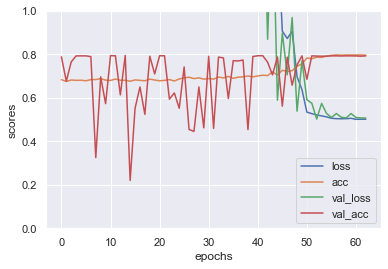

In [30]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('epochs')
plt.ylabel('scores')
plt.show()

predict - threshold 0.5

In [31]:
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:10])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


accuracy score and confusion matrix

accuracy_score=0.792


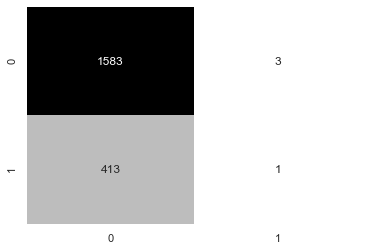

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix 
import seaborn as sns 

print(f'accuracy_score={accuracy_score(y_val, y_pred)}')
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d',
            cmap='binary', cbar=False)